In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import datetime
from scipy import signal
from scipy.signal import butter, lfilter, freqz
import pywt
from scipy import integrate
import statistics
import math 
from scipy.signal import find_peaks, peak_prominences
#from datetime import datetime
warnings.filterwarnings("ignore")

In [37]:
data_df=pd.read_csv('array_to_return.csv')
raw_data=pd.read_csv('segmented.csv',header=None)

In [38]:
data_accx_test=raw_data.iloc[:,1]
data_accy_test=raw_data.iloc[:,2]
data_accz_test=raw_data.iloc[:,3]
data_gyrox_test=raw_data.iloc[:,4]
data_gyroy_test=raw_data.iloc[:,5]
data_gyroz_test=raw_data.iloc[:,6]

In [39]:
raw_data.head()

,0,1,2,3,4,5,6
0,-0.990195,-0.990195,9.656150,2.369412,1.876537,14.166640,2.295412
1,-1.027044,-1.027044,9.657468,2.388235,1.366715,14.981388,2.715140
2,-0.999266,-0.999266,9.657468,2.388235,0.948227,15.644277,2.922422
3,-0.953158,-0.953158,9.704694,2.369412,0.654612,15.796896,3.155916
4,-0.925380,-0.925380,9.733820,2.369412,0.886240,15.921266,2.954240


In [40]:
data_df.head()

,Unnamed: 0,start,stop
0,0,3,46
1,1,46,48
2,2,50,52


In [41]:
print(data_df)

   Unnamed: 0  start  stop
0           0      3    46
1           1     46    48
2           2     50    52


In [42]:
start=data_df['start']
stop=data_df['stop']

In [54]:
s_data_accx_test=data_accx_test[start[0]*250:(stop[0]-1)*250]
s_data_accy_test=data_accy_test[start[0]*250:(stop[0]-1)*250]
s_data_accz_test=data_accz_test[start[0]*250:(stop[0]-1)*250]


In [44]:
for i in range(0,len(start)):
    s_data_accx_test[i]=data_accx_test[(start[i]+3)*250:(stop[i]-1)*250]
    s_data_accy_test[i]=data_accy_test[(start[i]+3)*250:(stop[i]-1)*250]
    s_data_accz_test[i]=data_accz_test[(start[i]+3)*250:(stop[i]-1)*250]

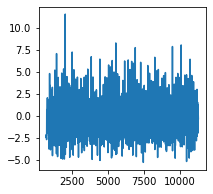

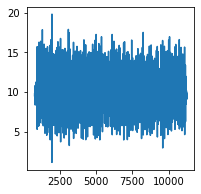

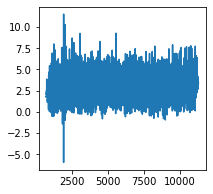

In [55]:
#for i in range(0,len(start)):
fig, ax = plt.subplots(figsize=(3,3))
plt.plot(s_data_accx_test)
fig, ax = plt.subplots(figsize=(3,3))
plt.plot(s_data_accy_test)
fig, ax = plt.subplots(figsize=(3,3))
plt.plot(s_data_accz_test)
  

In [46]:
i=0
s_data_accx_test=data_accx_test[start[i]*250:(stop[i]-1)*250]
s_data_accy_test=data_accy_test[start[i]*250:(stop[i]-1)*250]
s_data_accz_test=data_accz_test[start[i]*250:(stop[i]-1)*250]


In [47]:
array_to_return = pd.DataFrame({
    'Av':s_data_accx_test ,
    'Am':s_data_accy_test ,
    'Ap': s_data_accz_test})
array_to_return = pd.DataFrame(array_to_return)
array_to_return.to_csv('AvAmAp.csv')

In [59]:
StepTime=[]
StepTime=np.array(StepTime,dtype=np.int64)
StanceTime=[]
StanceTime=np.array(StanceTime,dtype=np.int64)
StrideTime=[]
StrideTime=np.array(StrideTime,dtype=np.int64)
SwingTime=[]
SwingTime=np.array(SwingTime,dtype=np.int64)
i=0
    #fig, ax = plt.subplots(figsize=(3,3))
    #plt.plot(s_data_accz_test[i])
av=s_data_accx_test
am=s_data_accy_test
aa=s_data_accz_test
fs=100.0

def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y
order = 4
fs = 100.0       
cutoff = 20.0  

b, a = butter_lowpass(cutoff, fs, order)

av = butter_lowpass_filter(av/9.81, cutoff, fs, order)
am = butter_lowpass_filter(am/9.81, cutoff, fs, order)
aa = butter_lowpass_filter(aa/9.81, cutoff, fs, order)
avMean = statistics.mean(av)                                                                
amMean = statistics.mean(am)
aaMean = statistics.mean(aa)
aA=aa*math.cos(math.asin(aaMean))- av*aaMean
avv=aa*(aaMean)+av*math.cos(math.asin(aaMean))
aM=am*math.cos(math.asin(amMean))- (avv*amMean); 
aV=am*amMean + avv*(math.cos(math.asin(amMean)))-1;
scale_cwt1 = float(fs)/ 5.0
scale_cwt2 = float(fs)/ 6.0
detrended_data = signal.detrend(aV)
def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y
order = 4
fs = 100.0       
cutoff = 20.0  

b, a = butter_lowpass(cutoff, fs, order)
filtered_data = butter_lowpass_filter(detrended_data, cutoff, fs, order)
integrated_data = integrate.cumtrapz(-filtered_data)
cwt_1, freqs = pywt.cwt(integrated_data, scale_cwt1, 'gaus1')
differentiated_data = cwt_1[0]
cwt_2, freqs = pywt.cwt(-differentiated_data, scale_cwt2, 'gaus1')
re_differentiated_data = cwt_2[0]
def _detect_peaks(y, prominence):
    from scipy.signal import find_peaks
    peaks, properties = find_peaks(y, prominence=prominence)

    return peaks

x=-differentiated_data
peaks, _ = find_peaks(x,height=1)
peak_pos=peaks
IC=peak_pos
y=re_differentiated_data
peaks_y, _ = find_peaks(y,height=5)
peak_pos_y=peaks_y
FC=peak_pos_y
X = len(IC)
#if (FC[0]-IC[0])< 0:
 #   FC = np.delete(FC, 0)
#if (FC[0]-IC[0])/100> 1:
 #   IC = np.delete(IC, 0)

total1=0;
total2=0;
total3=0;
integ=0
for j in range(0,X-2):
    StepTime=(IC[j+1]-IC[j])
    total1=total1+StepTime
for j in range(0,X-2):    
    StanceTime= FC[j + 1] - IC[j]
    if 20< StanceTime<100:
        total2=total2+StanceTime
    integ=integ+1
for j in range(0,X-2):        
    StrideTime = IC[j + 2] - IC[j]
    total3=total3+StrideTime
    

StepTime=(total1)/((X-2)*100)
StanceTime=(total2)/((integ)*100)
StrideTime=(total3)/((X-2)*100)
SwingTime=StrideTime-StanceTime
print('StepNumber=',X)
print('StepTime=',StepTime)
print('StanceTime=',StanceTime)
print('StrideTime=',StrideTime)
print('SwingTime=',SwingTime)




StepNumber= 170
StepTime= 0.6174404761904762
StanceTime= 0.0
StrideTime= 1.2275595238095238
SwingTime= 1.2275595238095238
